# 전처리

In [7]:
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분

In [8]:
#given cities
cities = []
#solution
sol = []

# Euclidean distance measuring function

In [9]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

# 데이터를 가져오기 및 확인

In [10]:
with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)
print('cities 에 들어간 원소의 개수 :',len(cities))
print(cities[:25])

cities 에 들어간 원소의 개수 : 1000
[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214'], ['45.263493711035', '24.433107718919345'], ['51.65884282004931', '90.10642634366273'], ['89.7286579150431', '69.21655768344208'], ['39.00003159887097', '80.55196125207841'], ['35.59526184197473', '14.05610647225216'], ['66.19318558706838', '55.68426760836053'], ['34.1551559598477', '85.84359753107817'], ['37.75840849411198', '8.948084373549136'], ['65.16521495804488', '93.65696789745532'], ['42.69022506258199', '92.09116283653597'], ['34.978245803048665', '90.63114224147267'], ['31.624449741999662', '37.20161513918061'], ['64.27557457661524', '47.52318749669915'], ['83.64758869867107', '0.8456953312116822'], ['66.90344399989151', '50.71682553053572'], ['16.884423905642787', '87.22366700571314'], ['87.5480501416314', '69.49436954110595'], ['5

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# Add Breadth First search for problem

In [11]:
#Breadth First Search를 먼저 정의(Queue를 통해 구현  -> 파이썬은 dequeue 이용)

# deque 연습

In [12]:
from collections import deque
queue = deque([1, 2, 3])
queue.append(4)
queue

deque([1, 2, 3, 4])

In [13]:
#popleft() 라는 메서드를 사용하면 list의 pop(0) 메서드와 같은 효과를 가진다
queue.popleft()

1

In [14]:
queue.popleft()

2

In [15]:
queue

deque([3, 4])

In [16]:
print("queue.pop() : " ,queue.pop(), "         queue after pop() : ", queue)

queue.pop() :  4          queue after pop() :  deque([3])


# node 수가 10개인 트리를 구현하기 위해서 군집화(k-clustering)을 사용하여 표본을 만들자

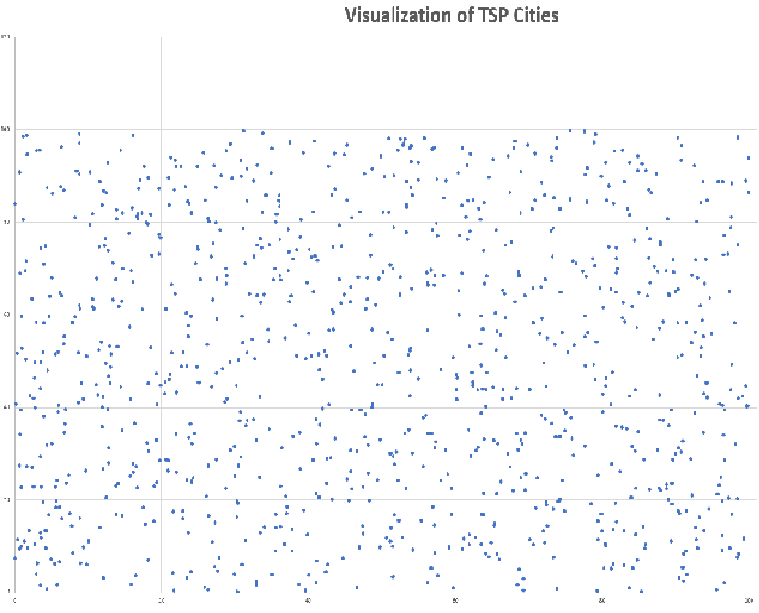

In [17]:
import PIL.Image as pilimg
pure_img = pilimg.open('visualization_cities_resized.PNG')
pure_img

In [18]:
#우리의 데이터
print(cities[:3])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211']]


# k-means

In [19]:
from sklearn.cluster import KMeans
k= 10 # 클러스터의 개수를 미리 지정(0~9)
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)
print("y_pred의 개수 : ",len(y_pred))
print(y_pred[:50])

y_pred의 개수 :  1000
[4 2 3 0 3 4 9 6 0 4 5 8 4 9 9 8 7 5 1 5 8 6 5 0 1 8 7 8 7 4 6 6 1 2 6 6 6
 0 2 1 2 6 1 6 1 0 8 7 1 6]


In [20]:
kmeans.cluster_centers_

array([[41.10083768, 65.35326998],
       [82.80500362, 16.96938869],
       [12.53779734, 16.36132673],
       [84.70620245, 84.85907784],
       [44.07334253, 16.31203808],
       [59.71776014, 40.7896006 ],
       [84.48831101, 55.46813017],
       [14.51047099, 48.08816155],
       [17.92441341, 84.22778982],
       [56.06465541, 87.62281377]])

In [21]:
kmeans.cluster_centers_[0]

array([41.10083768, 65.35326998])

In [22]:
x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen

[41.100837681369555,
 82.80500361593971,
 12.537797340768016,
 84.70620245083883,
 44.07334253195055,
 59.717760144130565,
 84.48831101283778,
 14.510470987106821,
 17.924413408318422,
 56.064655411263104]

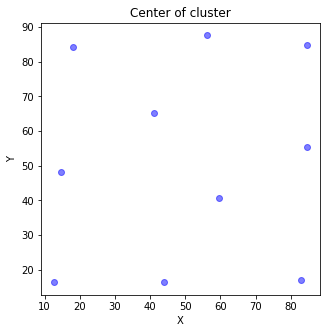

In [24]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

#scatter plot 데이터를 생성
x = x_cen
y = y_cen

plt.scatter(x,y,c='b',alpha= 0.5) #->그래프의 객체 생성
#alpha는 점들의 크기 label은 설명란
#plt.legend(loc = 'upper right') #밑에 Scatter point 박스의 위치를 선정 
plt.xlabel('X') #--->x축의 제목
plt.ylabel('Y') #--->y축의 제목
plt.title("Center of cluster") # ---> 그래프 제목

plt.show()  #-> 그래프를 출력

# 데이터 분할

In [25]:
index_0 = []
index_1 = []
index_2 = []
index_3 = []
index_4 = []
index_5 = []
index_6 = []
index_7 = []
index_8 = []
index_9 = []
for idx in range (0,1000):
    if y_pred[idx] == 0:
        index_0.append(int(idx))
        
    elif y_pred[idx] == 1:
        index_1.append(int(idx))
        
    elif  y_pred[idx] == 2:
        index_2.append(int(idx))
        
    elif  y_pred[idx] == 3:
        index_3.append(int(idx))  
        
    elif  y_pred[idx] == 4:
        index_4.append(int(idx))     
        
    elif  y_pred[idx] == 5:
        index_5.append(int(idx))  
        
    elif  y_pred[idx] == 6:
        index_6.append(int(idx))
        
    elif  y_pred[idx] == 7:
        index_7.append(int(idx))
        
    elif  y_pred[idx] == 8:
        index_8.append(int(idx))
        
    else:
        index_9.append(int(idx))        
    

In [26]:
#이중배열로 해결해보자
index_total = []
index_total.append(index_0)
index_total.append(index_1)
index_total.append(index_2)
index_total.append(index_3)
index_total.append(index_4)
index_total.append(index_5)
index_total.append(index_6)
index_total.append(index_7)
index_total.append(index_8)
index_total.append(index_9)

In [27]:
print(index_total[5])

[10, 17, 19, 22, 58, 66, 78, 81, 101, 103, 107, 120, 125, 137, 144, 146, 161, 205, 213, 218, 233, 237, 238, 272, 281, 303, 319, 335, 344, 373, 417, 418, 440, 446, 449, 464, 469, 482, 488, 497, 511, 520, 531, 540, 554, 561, 586, 593, 594, 610, 627, 632, 636, 638, 648, 657, 667, 675, 696, 701, 707, 708, 711, 716, 734, 741, 751, 765, 772, 773, 775, 779, 792, 793, 796, 810, 821, 829, 836, 849, 851, 882, 891, 893, 916, 925, 929, 941, 952, 973, 978, 979, 986, 989, 993, 994]


In [28]:
print("index_0 : ",len(index_0), "\n","index_1 : ",len(index_1), "\n","index_2 : ",len(index_2), "\n","index_3 : ",len(index_3), "\n","index_4 : ",len(index_4), "\n",
      "index_5 : ",len(index_5), "\n","index_6 : ",len(index_6), "\n","index_7 : ",len(index_7), "\n","index_8 : ",len(index_8), "\n","index_9 : ",len(index_9))

index_0 :  93 
 index_1 :  126 
 index_2 :  100 
 index_3 :  78 
 index_4 :  101 
 index_5 :  96 
 index_6 :  101 
 index_7 :  113 
 index_8 :  112 
 index_9 :  80


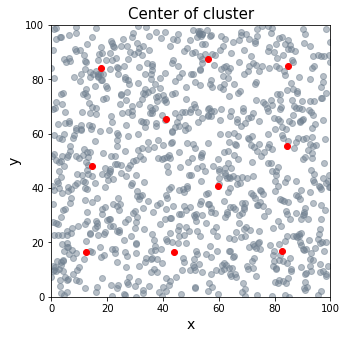

In [29]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Center of cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for idx in range(0,10):
    for m in index_total[idx]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")

plt.scatter(x_cen,y_cen,c='r') # cluster의 center를 빨강으로 표시

plt.show()

# 가시화

In [31]:
print(cities[:5])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214']]


In [32]:
#print(index_0[2])
print(cities[index_0[2]])
print(cities[index_0[2]][0])

['38.34965160669239', '74.01538577420033']
38.34965160669239


In [33]:
print(index_total[5])
count=0
for i in index_total[5]:
    print(cities[i][0])
    count = count+1
    if count== 10:
        break

[10, 17, 19, 22, 58, 66, 78, 81, 101, 103, 107, 120, 125, 137, 144, 146, 161, 205, 213, 218, 233, 237, 238, 272, 281, 303, 319, 335, 344, 373, 417, 418, 440, 446, 449, 464, 469, 482, 488, 497, 511, 520, 531, 540, 554, 561, 586, 593, 594, 610, 627, 632, 636, 638, 648, 657, 667, 675, 696, 701, 707, 708, 711, 716, 734, 741, 751, 765, 772, 773, 775, 779, 792, 793, 796, 810, 821, 829, 836, 849, 851, 882, 891, 893, 916, 925, 929, 941, 952, 973, 978, 979, 986, 989, 993, 994]
66.19318558706838
64.27557457661524
66.90344399989151
52.33278417340765
56.29777554048214
71.71354431100629
62.1102285198305
62.810635012052394
56.25117671915295
63.0069902197132


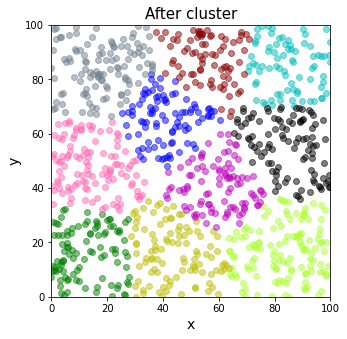

In [34]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")

#c = 'b,g,r,c,y,m,k,w'  -> color

#plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
#plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.show()




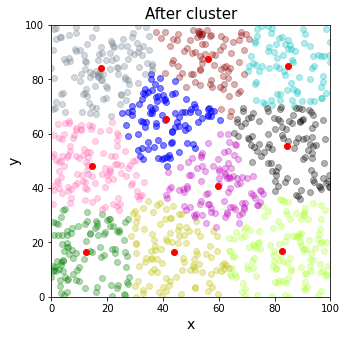

In [35]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="darkred")
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.show()  #-> 그래프를 출력
#c = 'b,g,r,c,y,m,k,w'  -> color



# BFS구현 

cluster 내부도 알고리즘으로 구현       
Greedy (내부 + 외부)

-----------------------           

# 1. center로만 생각

In [36]:
print("x_cen : ",x_cen)
print(" ")
print("y_cen : ",y_cen)

x_cen :  [41.100837681369555, 82.80500361593971, 12.537797340768016, 84.70620245083883, 44.07334253195055, 59.717760144130565, 84.48831101283778, 14.510470987106821, 17.924413408318422, 56.064655411263104]
 
y_cen :  [65.35326997657386, 16.96938868528386, 16.361326726021233, 84.859077844338, 16.312038084839635, 40.78960060035583, 55.46813017485538, 48.08816155480108, 84.22778982483464, 87.62281377300023]


In [37]:
kmeans.cluster_centers_

array([[41.10083768, 65.35326998],
       [82.80500362, 16.96938869],
       [12.53779734, 16.36132673],
       [84.70620245, 84.85907784],
       [44.07334253, 16.31203808],
       [59.71776014, 40.7896006 ],
       [84.48831101, 55.46813017],
       [14.51047099, 48.08816155],
       [17.92441341, 84.22778982],
       [56.06465541, 87.62281377]])

In [39]:
distance(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1])

63.87673618077088

In [40]:
NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp_cen_dis = []
cen_dis = []
temp=100
i=0
for j in range(0,NUMBER_OF_CLUSTER):
    if i==j: #예외처리
        pass
    else:
        if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
            index_min_distance = j
            temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
            temp_cen_dis.append(j)
        else:
            pass
cen_dis.append(max(temp_cen_dis))
        

In [41]:
cen_dis

[9]

center 간의 거리를 확인하고 싶으면 아래 코드를 돌리기

In [42]:
for i in range (0,10):
    print("target : ", i)
    for k in range (0,10):
        if(i==k):
            pass
        else:
            print(distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k]))
    

target :  0
63.87673618077088
56.710296921848325
47.76928277934056
49.13123457176277
30.821480418834632
44.499312702427055
31.70381001947441
29.889699590107362
26.829991091210392
target :  1
63.87673618077088
70.26983717829316
67.91630475167811
38.737238932800885
33.172628879929476
38.535524131290956
75.05012466275669
93.45150351673325
75.54437569225719
target :  2
56.710296921848325
70.26983717829316
99.4998522832982
31.53558370912556
53.128988834779946
81.8915044046722
31.788102956414964
68.07989751903123
83.5032149658669
target :  3
47.76928277934056
67.91630475167811
99.4998522832982
79.68516778534288
50.66104098292444
29.39175533357986
79.24355494613117
66.78477275759249
28.774579981358677
target :  4
49.13123457176277
38.737238932800885
31.53558370912556
79.68516778534288
29.049937506392194
56.27227758917265
43.40144463903438
72.77579150185433
72.3119513899101
target :  5
30.821480418834632
33.172628879929476
53.128988834779946
50.66104098292444
29.049937506392194
28.793044660276

target :  0
The nearest node is :  9
target :  1
The nearest node is :  5
target :  2
The nearest node is :  4
target :  3
The nearest node is :  9
target :  4
The nearest node is :  5
target :  5
The nearest node is :  6
target :  6
The nearest node is :  5
target :  7
The nearest node is :  0
target :  8
The nearest node is :  0
target :  9
The nearest node is :  0


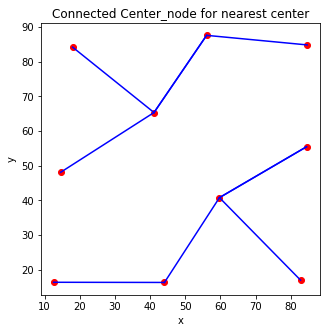

In [51]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Center_node for nearest center")
plt.xlabel("x")
plt.ylabel("y")

NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
for i in range (0,NUMBER_OF_CLUSTER):
    print("target : ", i)
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    print("The nearest node is : ",min_index)
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

plt.show()  #-> 그래프를 출력

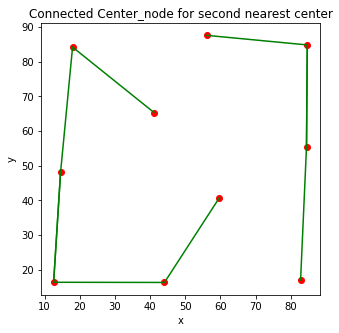

In [52]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Center_node for second nearest center")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center2 = []
for i in range (0,NUMBER_OF_CLUSTER):
    #print("target : ", i)
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    #print("The nearest node is : ",min_index)
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

plt.show()  #-> 그래프를 출력

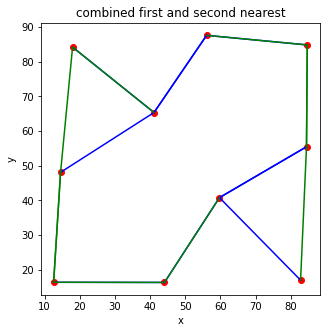

In [53]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("combined first and second nearest")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
distance_center2 = []

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

plt.show()  #-> 그래프를 출력

In [57]:
distance_center

[9, 5, 4, 9, 5, 6, 5, 0, 0, 0]

In [58]:
distance_center2

[8, 6, 7, 6, 2, 4, 3, 2, 7, 3]

idea : 가장 인접한 곳이 많은 node를 시작 과 종료 node로 잡아보자    
0는 파란색이 많고 8은 초록색이 많으니깐 0를 선택

(이 부분에 대해서는 추후에 해결 예정)

# BFS

In [64]:
import math

def dist(a,b):
    x = (float(kmeans.cluster_centers_[b][0])-float(kmeans.cluster_centers_[a][0]))
    y = (float(kmeans.cluster_centers_[a][1])-float(kmeans.cluster_centers_[b][1]))  
    
    r = math.sqrt((x * x) + (x* x))
    return r

graph = {
    0: set([7,8,9]),
    1: set([5]),
    2: set([4,7]),
    3: set([9,6]),
    4: set([5,2]),
    5: set([6,1,4]),
    6: set([5,1,3,]),
    7: set([0,2,8]),
    8: set([0]),
    9: set([0,3])
    
}

In [68]:
from collections import deque

def bfs(graph, start):
    visited_nodes = []
    adjacency_nodes = deque([start]) 
    while adjacency_nodes:
        node = adjacency_nodes.popleft()
        if node not in visited_nodes: #방문을 하지 않았을 때(예외 처리)
            visited_nodes.append(node) #방문 노드에 추가
            adjacency_nodes.extend(graph[node]) #extend 각각의 요소를 추가

    return visited_nodes


path =bfs(graph,0) #여기서 출력되는건 최단 경로가 아닌 search 순서 이다

In [69]:
kmeans.cluster_centers_[i][0]

56.064655411263104

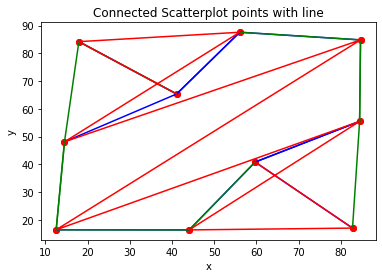

In [70]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
distance_center2 = []

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

    
x_path=[]
y_path=[]

for i in path:
#for i in ans:
    x_path.append(float(kmeans.cluster_centers_[i][0]))
    y_path.append(float(kmeans.cluster_centers_[i][1]))
    
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_path,y_path,c='r')

# 결론 

결국엔 시작 노드와 가까운 순서대로 이동을 하게 되는데 path에 weight 존재    
즉, greedy search와 크게 차이 x

그러므로 greedy search로 구현해보자